<a href="https://githubtocolab.com/pinshuai/modvis/blob/master/examples/notebooks/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Model evaluation

This example shows how to load model and observation data and evalute model performance. 

In [ ]:
# skip this if package has already been installed
!pip install modvis

In [1]:
from modvis import ATSutils
from modvis import utils
from modvis import general_plots as gp

import matplotlib.pyplot as plt

model_dir = "../data/coalcreek"

Download the sample data when running on `Google Colab`

In [ ]:
# import os
# if not os.path.exists(model_dir):
#   !git clone https://github.com/pinshuai/modvis.git
#   %cd ./modvis/examples/notebooks

## Load model data

This will load the `water_balance-daily.dat` file generated from ATS model. The data file includes watershed variables including outlet discharge, ET, and etc. By default, setting `plot=True` will show the water balance plots for `global, canopy, snow, surface, and subsurface` domains. **It is important to check if `max error` is close to zero!** Otherwise, there may be a water balance issue in the model.

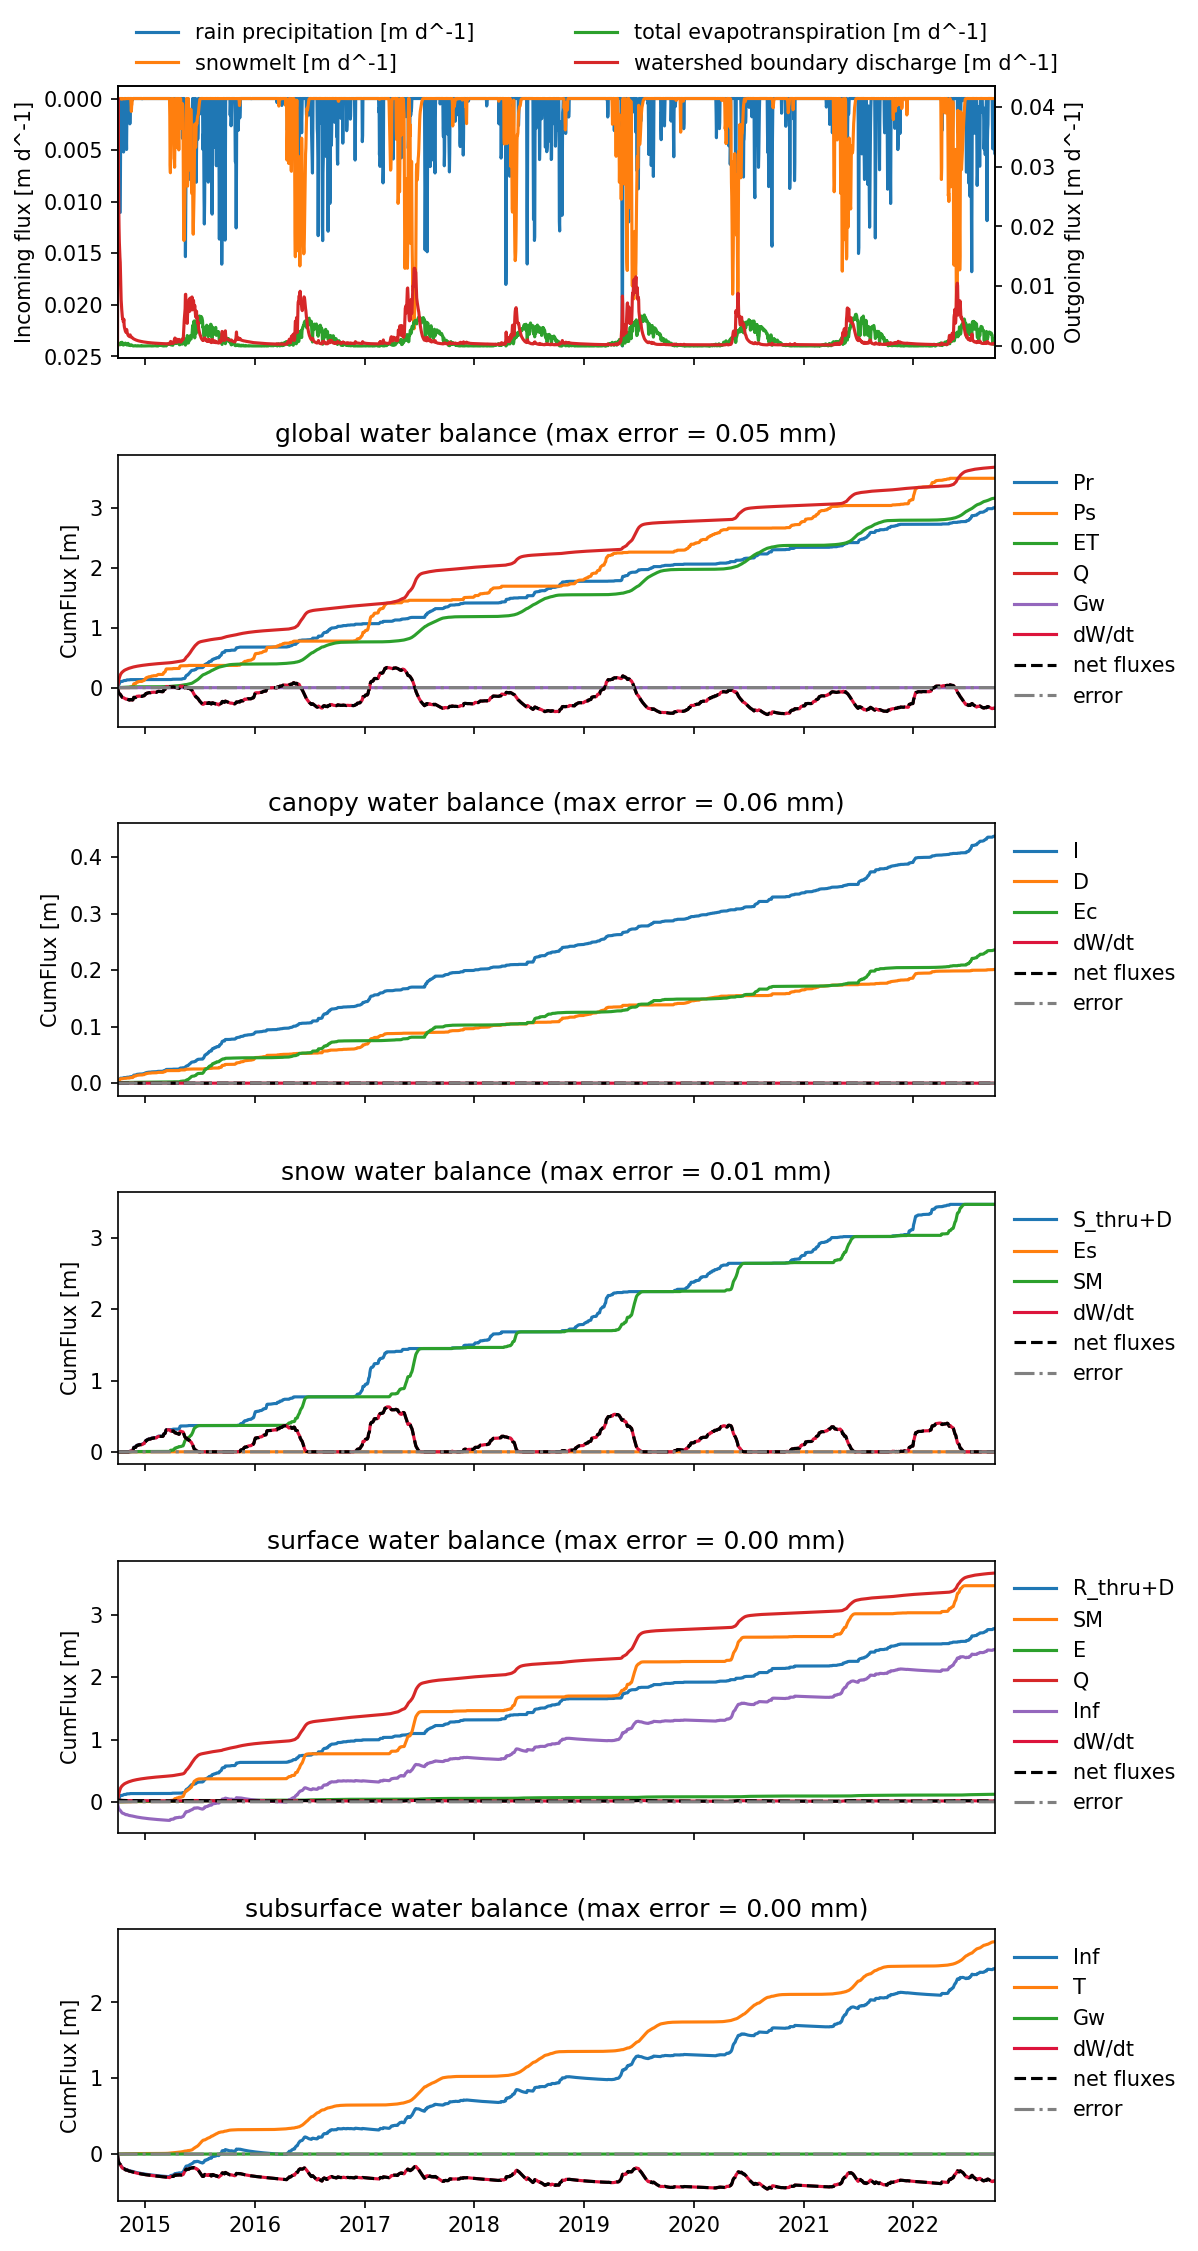

In [2]:
simu_df = ATSutils.load_waterBalance(model_dir, WB_filename="water_balance-daily.dat",
                                plot = True)

## Load observation data

Load USGS gage data.

<AxesSubplot:>

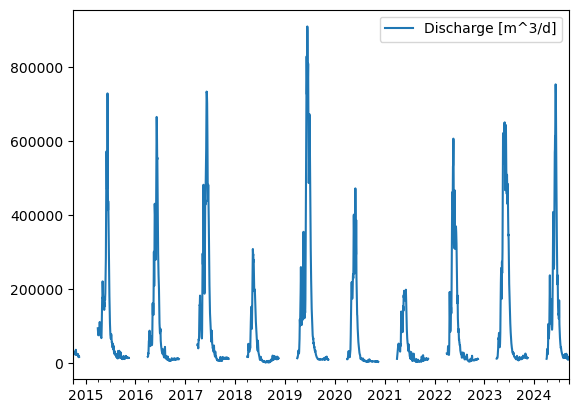

In [3]:
obs_df = utils.load_nwis(sites= "09111250", start = '2014-10-01')

obs_df.plot()

## Streamflow comparison

Compare simulated streamflow with observed USGS streamflow. Note the large peak flow at the begining or the simulation is due to spinups. Suggest to discard the first year or two for calibration.

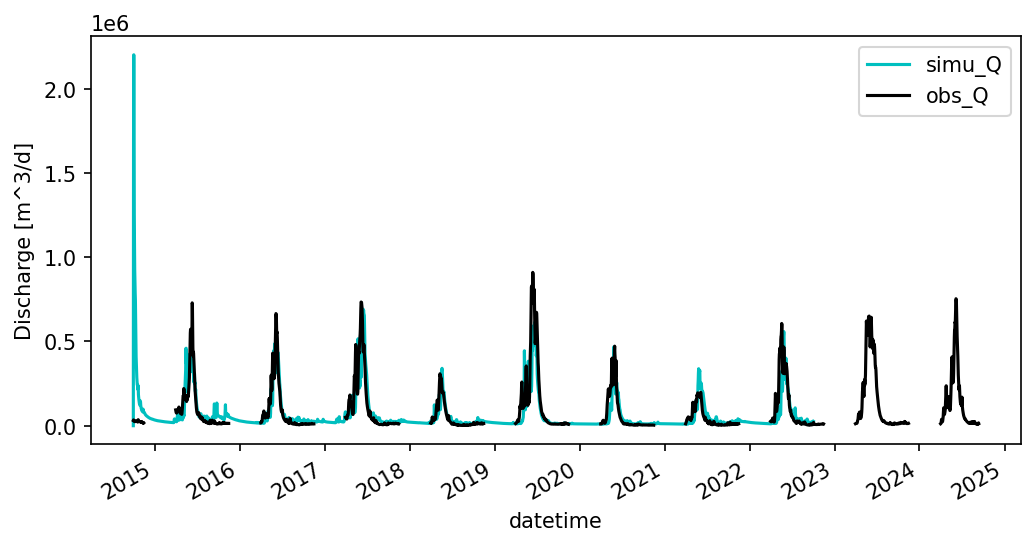

In [4]:
fig,ax = plt.subplots(1,1, figsize=(8,4), dpi=150)
simu_df['watershed boundary discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")
obs_df['Discharge [m^3/d]'].plot(color = 'k', ax=ax, label = "obs_Q")
ax.set_ylabel("Discharge [m^3/d]")
ax.legend()

## FDC comparison

Compare the simulated vs. observed flow duration curve. This is helpful for determine if the model is under/over-estimate high/low flows.

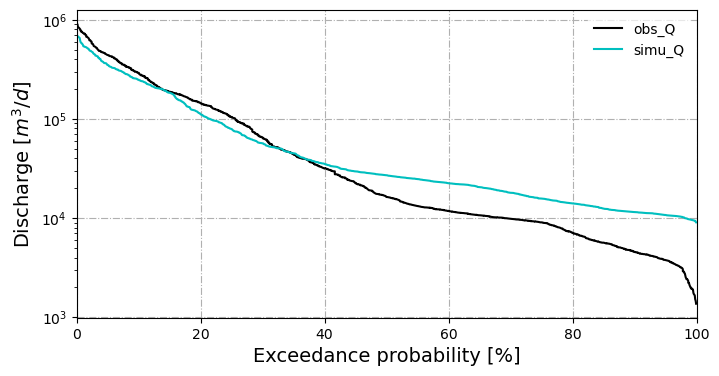

In [5]:
fig, ax = gp.plot_FDC(dfs=[obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]']],
           labels=['obs_Q','simu_Q'], 
           colors=['k', 'c'],
           start_date="2016-10-01" 
           )

## One-to-one plot

One to one scatter plot with common metrics such as `R^2`, `NSE`, and `mKGE` (modified KGE). The closer the metric is to one, the better the simulation.

{'R^2': 0.6759567554415563,
 'NSE': 0.6710004414847291,
 'mKGE': 0.7587986727375899}

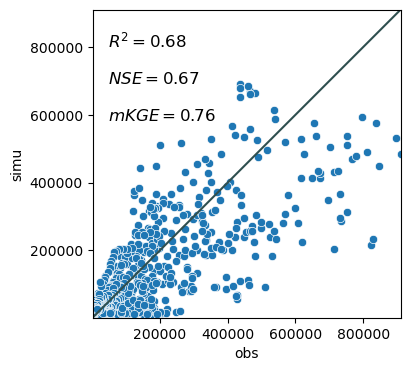

In [6]:
gp.one2one_plot(obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]'],
               metrics=['R^2', 'NSE', 'mKGE'],
                # metrics='all',
               show_density=False,
                start_date="2016-10-01"
               )